In [ ]:
import pandas as pd

In [ ]:
# (a)

In [ ]:
df_collision_mitigation_braking = pd.read_json("/content/drive/MyDrive/collision_mitigation_braking.json")

In [ ]:
df_esc_alert = pd.read_json("/content/drive/MyDrive/esc_alert.json")

In [ ]:
df_forward_collision_warning = pd.read_json("/content/drive/MyDrive/forward_collision_warning.json")

In [ ]:
df_large_set = pd.read_json("/content/drive/MyDrive/large_set.json")

In [ ]:
df_rsc_engine_alert = pd.read_json("/content/drive/MyDrive/rsc_engine_alert.json")

In [ ]:
df_collision_mitigation_braking.columns

Index(['version', 'type', 'vin', 'dataSource', 'trigger', 'sparse', 'seq',
       'endTimestamp'],
      dtype='object')

In [ ]:
df_esc_alert.columns

Index(['seq', 'version', 'endTimestamp', 'type', 'vin', 'dataSource', 'sparse',
       'trigger'],
      dtype='object')

In [ ]:
df_forward_collision_warning.columns

Index(['seq', 'version', 'endTimestamp', 'type', 'vin', 'dataSource',
       'trigger', 'sparse'],
      dtype='object')

In [ ]:
df_large_set.columns

Index(['seq', 'version', 'endTimestamp', 'type', 'vin', 'dataSource', 'sparse',
       'trigger'],
      dtype='object')

In [ ]:
df_rsc_engine_alert.columns

Index(['seq', 'version', 'endTimestamp', 'type', 'vin', 'dataSource', 'sparse',
       'trigger'],
      dtype='object')

In [ ]:
df_rsc_engine_alert.head(5)

,seq,version,endTimestamp,type,vin,dataSource,sparse,trigger
0,9615.0,8,1.664150e+12,analytics,1FUJAPCK25DU88948,{'ctpSource': {'serial': 'XXXXXXXXXX'}},"[{'timestamp': 1664150446000, 'decomposedMessa...",NaN
1,9616.0,8,1.664151e+12,analytics,1FUJAPCK25DU88948,{'ctpSource': {'serial': 'XXXXXXXXXX'}},"[{'timestamp': 1664150566000, 'decomposedMessa...",NaN
2,9617.0,8,1.664151e+12,analytics,1FUJAPCK25DU88948,{'ctpSource': {'serial': 'XXXXXXXXXX'}},"[{'timestamp': 1664150686000, 'decomposedMessa...",NaN
3,9618.0,8,1.664151e+12,analytics,1FUJAPCK25DU88948,{'ctpSource': {'serial': 'XXXXXXXXXX'}},"[{'timestamp': 1664150806000, 'decomposedMessa...",NaN
4,9619.0,8,1.664151e+12,analytics,1FUJAPCK25DU88948,{'ctpSource': {'serial': 'XXXXXXXXXX'}},"[{'timestamp': 1664150926000, 'decomposedMessa...",NaN


In [ ]:
df_rsc_engine_alert.shape

(846, 8)

In [ ]:
df_rsc_engine_alert['sparse'][2][1]['decomposedMessages']

[{'signal': 'ABA_DistToObj_Cval', 'value': 135},
 {'signal': 'AccelPdlPos_Cval', 'value': 100},
 {'signal': 'DEF_Conv_Cval', 'value': 0.71},
 {'signal': 'EngRPM_Cval_CPC3', 'value': 1213.25},
 {'signal': 'EngTrq_Cval_PT', 'value': 806},
 {'signal': 'DistToFwdVeh_Cval', 'value': 255},
 {'signal': 'StwAngl_Cval', 'value': -0.352515624999998},
 {'signal': 'HRTotalFuelCons_Cval_ICUC', 'value': 113452.43},
 {'signal': 'TotalVehDist_Cval_CPC', 'value': 367039790},
 {'signal': 'TxOilTemp_Cval_CPC', 'value': 72.78125},
 {'signal': 'VehSpd_Cval_CPC', 'value': 104.90625},
 {'signal': 'Accel_X_Cval', 'value': -0.8999996},
 {'signal': 'Accel_Y_Cval', 'value': 0.28028515625},
 {'signal': 'YawRate_Cval_BS', 'value': 0.0078564453125}]

In [ ]:
import pandas as pd

import numpy as np


engine_speed = []

fuel_consumption = []

gear = []

for i in range(846):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if  df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'EngRPM_Cval_CPC3':
        engine_speed.append((df_rsc_engine_alert['sparse'][i][j]['timestamp'], df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value']))
    for m in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if  df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][m]['signal'] == 'HRTotalFuelCons_Cval_ICUC':
        fuel_consumption.append((df_rsc_engine_alert['sparse'][i][j]['timestamp'], df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][m]['value']))
    for n in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if  df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][n]['signal'] == 'TxCurrGr_Stat':
        gear.append((df_rsc_engine_alert['sparse'][i][j]['timestamp'], df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][n]['value']))


#for i in range(846):
#  for j in range(len(df_rsc_engine_alert['sparse'][i])):
#    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
#      if  df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'HRTotalFuelCons_Cval_ICUC':
#        fuel_consumption.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])

In [ ]:
df_rsc_engine_alert['sparse'][1][0]

{'timestamp': 1664150566000,
 'decomposedMessages': [{'signal': 'ABA_DistToObj_Cval', 'value': 191},
  {'signal': 'DEF_Conv_Cval', 'value': 0.34},
  {'signal': 'EngRPM_Cval_CPC3', 'value': 1094.625},
  {'signal': 'EngTrq_Cval_PT', 'value': 2367.6},
  {'signal': 'StwAngl_Cval', 'value': -0.268531249999998},
  {'signal': 'HRTotalFuelCons_Cval_ICUC', 'value': 113451.055},
  {'signal': 'TotalVehDist_Cval_CPC', 'value': 367036410},
  {'signal': 'TxOilTemp_Cval_CPC', 'value': 73},
  {'signal': 'VehSpd_Cval_CPC', 'value': 94.09766},
  {'signal': 'Accel_X_Cval', 'value': 0.6999998},
  {'signal': 'Accel_Y_Cval', 'value': 0.1801875},
  {'signal': 'YawRate_Cval_BS', 'value': -0.002519531249999}]}

In [ ]:
ts1 = []

for i in range(len(engine_speed)):
  ts1.append(engine_speed[i][0]['timestamp'])


(array([11187.,  2861., 16438.,  7920.,  3800.,  2483.,  5093.,  4166.,
         4594.,  5153.]),
 array([113449.18 , 113478.918, 113508.656, 113538.394, 113568.132,
        113597.87 , 113627.608, 113657.346, 113687.084, 113716.822,
        113746.56 ]),
 <a list of 10 Patch objects>)

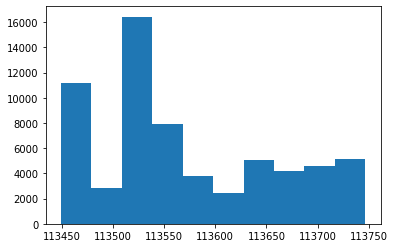

In [ ]:
f = []

for i in range(len(fuel_consumption)):
  f.append(fuel_consumption[i][1])

plt.hist(f, bins=10)

In [ ]:
len(gear)

3040

In [ ]:
new_list = []

#for i in range(len(engine_speed)):
#  for j in range(len(fuel_consumption)):
#    if engine_speed[i][0] == fuel_consumption[j][0]:
#      new_list.append((engine_speed[i][1], fuel_consumption[j][1]))

for i in range(2000):
  for j in range(2000):
    for k in range(2000):
      if engine_speed[i][0] == fuel_consumption[j][0]:
        if engine_speed[i][0] == gear[k][0]:
          new_list.append((engine_speed[i][1], gear[k][1], fuel_consumption[j][1]))

In [ ]:
len(new_list)

77

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


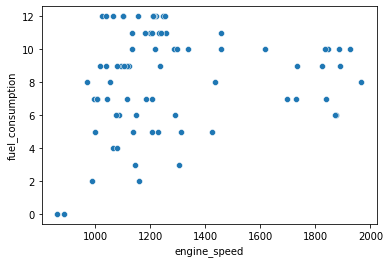

In [ ]:


import matplotlib.pyplot as plt

import seaborn as sns

es = []

for i in range(len(new_list)):
  es.append(new_list[i][0])

fc = []

for i in range(len(new_list)):
  fc.append(new_list[i][1])

plt.xlabel('engine_speed')
plt.ylabel('fuel_consumption')
sns.scatterplot(es, fc)

In [ ]:
df_esc_alert['sparse'][0][1]

{'timestamp': 1664755337000,
 'decomposedMessages': [{'signal': 'EngRPM_Cval_CPC3', 'value': 652.625},
  {'signal': 'EngTrq_Cval_PT', 'value': 42},
  {'signal': 'Accel_X_Cval', 'value': 0},
  {'signal': 'Accel_Y_Cval', 'value': -0.169910156249999},
  {'signal': 'YawRate_Cval_BS', 'value': -0.000322265624999}]}

In [ ]:
df_esc_alert['sparse'][10][3]['decomposedMessages']


x = []

for i in range(df_esc_alert.shape[0]):
  for j in range(len(df_esc_alert['sparse'][i])):
    for k in range(len(df_esc_alert['sparse'][i][j]['decomposedMessages'])):
      x.append(df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['signal'])

print(np.unique(x))

y = np.unique(x)

['ABA_Actv_Stat' 'ABA_DistToObj_Cval' 'ABA_DrvOvrd_Stat' 'ABA_LmpMon_Stat'
 'ABA_SelObj_Stat' 'ABS_Actv2_Stat' 'ACC_DistAlertSgl_Stat'
 'ACC_OptWarn_Rq' 'ACC_SetDistMode_Stat' 'ALA_EDSS_HazLgt_Rq'
 'ALA_EDSS_Warn_Rq' 'ALA_LDP_DrvActvn_Stat' 'ALA_LDP_Intrvntn_Stat'
 'ALA_LDP_Stat' 'ALA_LK_DrvActvn_Stat' 'ALA_LK_FctChgWarn_Stat'
 'ALA_LK_HndOnDeact_Stat' 'ALA_LK_HndOnWarn_Stat' 'ALA_LK_Stat'
 'ASGA_BrkOcc_Rq' 'AccelPdlPos_Cval' 'Accel_X_Cval' 'Accel_Y_Cval'
 'ActlEmotTrq_Cval' 'ActlRetPctTrq_Cval_CPC3' 'AirTempOutsd_Cval_SCA'
 'BSM_AcstcWarnRt_Rq' 'BrkAirPress1_Stat_EAPU' 'BrkAirPress2_Stat_EAPU'
 'BrkPdlPosn_Cval' 'CC_Actv_Stat' 'CC_Actvn_Stat' 'CC_FuncMode_Stat'
 'CC_SetSpd2_Cval' 'DEF_Conv_Cval' 'DiffSpdFwdVeh_Cval'
 'DispAutoMan_Rq_CPC' 'DistToFwdVeh_Cval' 'DoserFuelRate_Cval_PT'
 'EcoRollPreSel_Stat' 'EngRPM_Cval_CPC3' 'EngTrq_Cval_PT'
 'ExtAccel_Rq_VRDU' 'ExtBrkStat_Rq_VRDU' 'Fan2_Stat_PT' 'FogLmpSwFt_Rq'
 'HRTotalFuelCons_Cval_ICUC' 'IPPC_Stat' 'LaneDptD_Actv_Stat_MPC'
 'LaneDptIm

In [ ]:
df_rsc_engine_alert['sparse'][0][1]

{'timestamp': 1664150445000,
 'decomposedMessages': [{'signal': 'ABA_DistToObj_Cval', 'value': 38},
  {'signal': 'AccelPdlPos_Cval', 'value': 60.4},
  {'signal': 'EngRPM_Cval_CPC3', 'value': 1642.125},
  {'signal': 'EngTrq_Cval_PT', 'value': 596.6001},
  {'signal': 'DistToFwdVeh_Cval', 'value': 38},
  {'signal': 'StwAngl_Cval', 'value': 0.041039062500001},
  {'signal': 'HRTotalFuelCons_Cval_ICUC', 'value': 113449.83},
  {'signal': 'TotalVehDist_Cval_CPC', 'value': 367033975},
  {'signal': 'TurnSiglLt_Cmd_SCA', 'value': 1},
  {'signal': 'TurnSiglRt_Cmd_SCA', 'value': 1},
  {'signal': 'VehSpd_Cval_CPC', 'value': 19.617188},
  {'signal': 'Accel_X_Cval', 'value': 1.1999998},
  {'signal': 'Accel_Y_Cval', 'value': 0.40040234375000006},
  {'signal': 'YawRate_Cval_BS', 'value': 0.005170898437500001}]}

In [ ]:
df_rsc_engine_alert['sparse'][0][1]['decomposedMessages']

x = []

for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      x.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'])

print(np.unique(x))

z = np.unique(x)

['ABA_Actv_Stat' 'ABA_DistToObj_Cval' 'ABA_DrvOvrd_Stat' 'ABA_LmpMon_Stat'
 'ABA_SelObj_Stat' 'ABS_Actv2_Stat' 'ACC_DistAlertSgl_Stat'
 'ACC_OptWarn_Rq' 'ACC_SetDistMode_Stat' 'ALA_EDSS_HazLgt_Rq'
 'ALA_EDSS_Warn_Rq' 'ALA_LDP_DrvActvn_Stat' 'ALA_LDP_Intrvntn_Stat'
 'ALA_LDP_Stat' 'ALA_LK_DrvActvn_Stat' 'ALA_LK_FctChgWarn_Stat'
 'ALA_LK_HndOnDeact_Stat' 'ALA_LK_HndOnWarn_Stat' 'ALA_LK_Stat'
 'ASGA_BrkOcc_Rq' 'AccelPdlPos_Cval' 'Accel_X_Cval' 'Accel_Y_Cval'
 'ActlEmotTrq_Cval' 'ActlRetPctTrq_Cval_CPC3' 'AirTempOutsd_Cval_SCA'
 'BSM_AcstcWarnRt_Rq' 'BrkAirPress1_Stat_EAPU' 'BrkAirPress2_Stat_EAPU'
 'BrkPdlPosn_Cval' 'CC_Actv_Stat' 'CC_Actvn_Stat' 'CC_FuncMode_Stat'
 'CC_SetSpd2_Cval' 'DEF_Conv_Cval' 'DiffSpdFwdVeh_Cval'
 'DispAutoMan_Rq_CPC' 'DistToFwdVeh_Cval' 'DoserFuelRate_Cval_PT'
 'EcoRollPreSel_Stat' 'EngRPM_Cval_CPC3' 'EngTrq_Cval_PT'
 'ExtAccel_Rq_VRDU' 'ExtBrkStat_Rq_VRDU' 'Fan2_Stat_PT' 'FogLmpSwFt_Rq'
 'HRTotalFuelCons_Cval_ICUC' 'IPPC_Stat' 'LaneDptD_Actv_Stat_MPC'
 'LaneDptIm

In [ ]:
# (d)

break1 = []
break2 = []
break3 = []
break4 = []

lane1 = []
lane2 = []
lane3 = []
lane4 = []
lane5 = []

tb1 = []
tb2 = []
tb3 = []
tb4 = []

tl1 = []
tl2 = []
tl3 = []
tl4 = []
tl5 = []

for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'BrkAirPress1_Stat_EAPU':
        break1.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tb1.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])


for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'BrkAirPress2_Stat_EAPU':
        break2.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tb2.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])


for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'ExtBrkStat_Rq_VRDU':
        break3.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tb3.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])


for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'ROP_BrkCtrlActv2_Stat':
        break4.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tb4.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])


for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'LaneDptD_Actv_Stat_MPC':
        lane1.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tl1.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])


for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'LaneDptImntLt_Rq_MPC':
        lane2.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tl2.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])



for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'LaneDptImntRt_Rq_MPC':
        lane3.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tl3.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])





for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'LaneDptWarnLt_Rq_MPC':
        lane4.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tl4.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])

for i in range(df_rsc_engine_alert.shape[0]):
  for j in range(len(df_rsc_engine_alert['sparse'][i])):
    for k in range(len(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'])):
      if df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'LaneDptWarnRt_Rq_MPC':
        lane5.append(df_rsc_engine_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tl5.append(df_rsc_engine_alert['sparse'][i][j]['timestamp'])

(array([114.,  19.,  16., 162., 132.,  61.,   0.,  55., 155., 215.]),
 array([1.66415033e+12, 1.66416939e+12, 1.66418846e+12, 1.66420752e+12,
        1.66422659e+12, 1.66424565e+12, 1.66426472e+12, 1.66428378e+12,
        1.66430285e+12, 1.66432191e+12, 1.66434098e+12]),
 <a list of 10 Patch objects>)

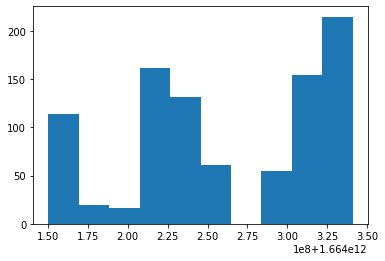

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.hist(tl5)

(array([100.,  19.,  17., 120., 135.,  60.,   0.,  47., 147., 157.]),
 array([1.66415033e+12, 1.66416940e+12, 1.66418848e+12, 1.66420755e+12,
        1.66422663e+12, 1.66424570e+12, 1.66426478e+12, 1.66428385e+12,
        1.66430292e+12, 1.66432200e+12, 1.66434107e+12]),
 <a list of 10 Patch objects>)

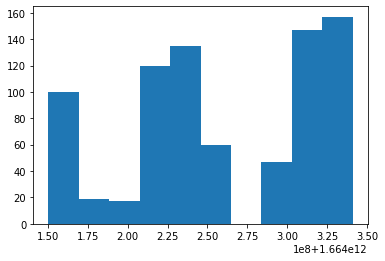

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.hist(tl1)

In [ ]:
df_esc_alert['sparse'][0][1]

{'timestamp': 1664755337000,
 'decomposedMessages': [{'signal': 'EngRPM_Cval_CPC3', 'value': 652.625},
  {'signal': 'EngTrq_Cval_PT', 'value': 42},
  {'signal': 'Accel_X_Cval', 'value': 0},
  {'signal': 'Accel_Y_Cval', 'value': -0.169910156249999},
  {'signal': 'YawRate_Cval_BS', 'value': -0.000322265624999}]}

In [ ]:
# (e)



t1 = []

temp = []

t2 = []

fog = []



for i in range(df_esc_alert.shape[0]):
  for j in range(len(df_esc_alert['sparse'][i])):
    for k in range(len(df_esc_alert['sparse'][i][j]['decomposedMessages'])):
      if df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'AirTempOutsd_Cval_SCA':
        temp.append(df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        t1.append(df_esc_alert['sparse'][i][j]['timestamp'])

for i in range(df_esc_alert.shape[0]):
  for j in range(len(df_esc_alert['sparse'][i])):
    for k in range(len(df_esc_alert['sparse'][i][j]['decomposedMessages'])):
      if df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'FogLmpSwFt_Rq':
        fog.append(df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        t2.append(df_esc_alert['sparse'][i][j]['timestamp'])

(array([  11.,   18.,  715.,  486., 1438.,  677.,  607., 1323.,  785.,
         203.]),
 array([ 0.     ,  3.06875,  6.1375 ,  9.20625, 12.275  , 15.34375,
        18.4125 , 21.48125, 24.55   , 27.61875, 30.6875 ]),
 <a list of 10 Patch objects>)

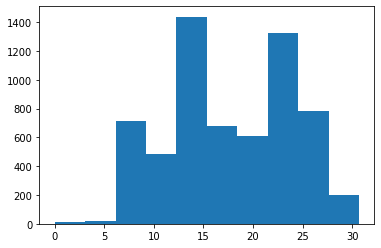

In [ ]:
plt.hist(temp)

(array([ 0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

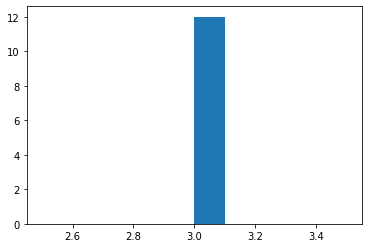

In [ ]:
plt.hist(fog)

In [ ]:
df_forward_collision_warning['sparse'][0][1]['decomposedMessages']

x = []

for i in range(df_forward_collision_warning.shape[0]):
  for j in range(len(df_forward_collision_warning['sparse'][i])):
    for k in range(len(df_forward_collision_warning['sparse'][i][j]['decomposedMessages'])):
      x.append(df_forward_collision_warning['sparse'][i][j]['decomposedMessages'][k]['signal'])

print(np.unique(x))

['ABA_Actv_Stat' 'ABA_DistToObj_Cval' 'ABA_DrvOvrd_Stat' 'ABA_LmpMon_Stat'
 'ABA_SelObj_Stat' 'ABS_Actv2_Stat' 'ACC_DistAlertSgl_Stat'
 'ACC_OptWarn_Rq' 'ACC_SetDistMode_Stat' 'ALA_EDSS_HazLgt_Rq'
 'ALA_EDSS_Warn_Rq' 'ALA_LDP_DrvActvn_Stat' 'ALA_LDP_Intrvntn_Stat'
 'ALA_LDP_Stat' 'ALA_LK_DrvActvn_Stat' 'ALA_LK_FctChgWarn_Stat'
 'ALA_LK_HndOnDeact_Stat' 'ALA_LK_HndOnWarn_Stat' 'ALA_LK_Stat'
 'ASGA_BrkOcc_Rq' 'AccelPdlPos_Cval' 'Accel_X_Cval' 'Accel_Y_Cval'
 'ActlEmotTrq_Cval' 'ActlRetPctTrq_Cval_CPC3' 'AirTempOutsd_Cval_SCA'
 'BSM_AcstcWarnRt_Rq' 'BrkAirPress1_Stat_EAPU' 'BrkAirPress2_Stat_EAPU'
 'BrkPdlPosn_Cval' 'CC_Actv_Stat' 'CC_Actvn_Stat' 'CC_FuncMode_Stat'
 'CC_SetSpd2_Cval' 'DEF_Conv_Cval' 'DiffSpdFwdVeh_Cval'
 'DispAutoMan_Rq_CPC' 'DistToFwdVeh_Cval' 'DoserFuelRate_Cval_PT'
 'EcoRollPreSel_Stat' 'EngRPM_Cval_CPC3' 'EngTrq_Cval_PT'
 'ExtAccel_Rq_VRDU' 'ExtBrkStat_Rq_VRDU' 'Fan2_Stat_PT' 'FogLmpSwFt_Rq'
 'HRTotalFuelCons_Cval_ICUC' 'IPPC_Stat' 'LaneDptD_Actv_Stat_MPC'
 'LaneDptIm

In [ ]:
df_collision_mitigation_braking['sparse'][20][50]['decomposedMessages']

x = []

for i in range(df_collision_mitigation_braking.shape[0]):
  for j in range(len(df_collision_mitigation_braking['sparse'][i])):
    for k in range(len(df_collision_mitigation_braking['sparse'][i][j]['decomposedMessages'])):
      x.append(df_collision_mitigation_braking['sparse'][i][j]['decomposedMessages'][k]['signal'])

print(np.unique(x))

['ABA_Actv_Stat' 'ABA_DistToObj_Cval' 'ABA_DrvOvrd_Stat' 'ABA_LmpMon_Stat'
 'ABA_SelObj_Stat' 'ABS_Actv2_Stat' 'ACC_DistAlertSgl_Stat'
 'ACC_OptWarn_Rq' 'ACC_SetDistMode_Stat' 'ALA_EDSS_HazLgt_Rq'
 'ALA_EDSS_Warn_Rq' 'ALA_LDP_DrvActvn_Stat' 'ALA_LDP_Intrvntn_Stat'
 'ALA_LDP_Stat' 'ALA_LK_DrvActvn_Stat' 'ALA_LK_FctChgWarn_Stat'
 'ALA_LK_HndOnDeact_Stat' 'ALA_LK_HndOnWarn_Stat' 'ALA_LK_Stat'
 'ASGA_BrkOcc_Rq' 'AccelPdlPos_Cval' 'Accel_X_Cval' 'Accel_Y_Cval'
 'ActlEmotTrq_Cval' 'ActlRetPctTrq_Cval_CPC3' 'AirTempOutsd_Cval_SCA'
 'BSM_AcstcWarnRt_Rq' 'BrkAirPress1_Stat_EAPU' 'BrkAirPress2_Stat_EAPU'
 'BrkPdlPosn_Cval' 'CC_Actv_Stat' 'CC_Actvn_Stat' 'CC_FuncMode_Stat'
 'CC_SetSpd2_Cval' 'DEF_Conv_Cval' 'DiffSpdFwdVeh_Cval'
 'DispAutoMan_Rq_CPC' 'DistToFwdVeh_Cval' 'DoserFuelRate_Cval_PT'
 'EcoRollPreSel_Stat' 'EngRPM_Cval_CPC3' 'EngTrq_Cval_PT'
 'ExtAccel_Rq_VRDU' 'ExtBrkStat_Rq_VRDU' 'FogLmpSwFt_Rq'
 'HRTotalFuelCons_Cval_ICUC' 'IPPC_Stat' 'LaneDptD_Actv_Stat_MPC'
 'LaneDptImntLt_Rq_MPC' 'L

In [ ]:
df_large_set['sparse'][0][1]['decomposedMessages']

x = []

for i in range(df_large_set.shape[0]):
  for j in range(len(df_large_set['sparse'][i])):
    for k in range(len(df_large_set['sparse'][i][j]['decomposedMessages'])):
      x.append(df_large_set['sparse'][i][j]['decomposedMessages'][k]['signal'])

print(np.unique(x))

['ABA_Actv_Stat' 'ABA_DistToObj_Cval' 'ABA_DrvOvrd_Stat' 'ABA_LmpMon_Stat'
 'ABA_SelObj_Stat' 'ABS_Actv2_Stat' 'ACC_DistAlertSgl_Stat'
 'ACC_OptWarn_Rq' 'ACC_SetDistMode_Stat' 'ALA_EDSS_HazLgt_Rq'
 'ALA_EDSS_Warn_Rq' 'ALA_LDP_DrvActvn_Stat' 'ALA_LDP_Intrvntn_Stat'
 'ALA_LDP_Stat' 'ALA_LK_DrvActvn_Stat' 'ALA_LK_FctChgWarn_Stat'
 'ALA_LK_HndOnDeact_Stat' 'ALA_LK_HndOnWarn_Stat' 'ALA_LK_Stat'
 'ASGA_BrkOcc_Rq' 'AccelPdlPos_Cval' 'Accel_X_Cval' 'Accel_Y_Cval'
 'ActlEmotTrq_Cval' 'ActlRetPctTrq_Cval_CPC3' 'AirTempOutsd_Cval_SCA'
 'BSM_AcstcWarnRt_Rq' 'BrkPdlPosn_Cval' 'CC_Actv_Stat' 'CC_Actvn_Stat'
 'CC_FuncMode_Stat' 'CC_SetSpd2_Cval' 'DEF_Conv_Cval' 'DispAutoMan_Rq_CPC'
 'DistToFwdVeh_Cval' 'DoserFuelRate_Cval_PT' 'EcoRollPreSel_Stat'
 'EngRPM_Cval_CPC3' 'EngTrq_Cval_PT' 'ExtAccel_Rq_VRDU'
 'ExtBrkStat_Rq_VRDU' 'Fan2_Stat_PT' 'FogLmpSwFt_Rq'
 'HRTotalFuelCons_Cval_ICUC' 'IPPC_Stat' 'LaneDptD_Actv_Stat_MPC'
 'LaneDptImntLt_Rq_MPC' 'LaneDptImntRt_Rq_MPC' 'LaneDptWarnLt_Rq_MPC'
 'LaneDptWarn

In [ ]:
# (c)

tstamp = []

lat = []

long = []

fwd = []



for i in range(df_esc_alert.shape[0]):
  for j in range(len(df_esc_alert['sparse'][i])):
    for k in range(len(df_esc_alert['sparse'][i][j]['decomposedMessages'])):
      if df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'Latitude_Cval_CTP':
        lat.append(df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
      if df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'Longitude_Cval_CTP':
        long.append(df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
      if df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['signal'] == 'DistToFwdVeh_Cval':
        fwd.append(df_esc_alert['sparse'][i][j]['decomposedMessages'][k]['value'])
        tstamp.append(df_esc_alert['sparse'][i][j]['timestamp'])

(array([1346., 1578., 1548., 1334.,  886.,  741.,  585.,  410.,    0.,
        1397.]),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]),
 <a list of 10 Patch objects>)

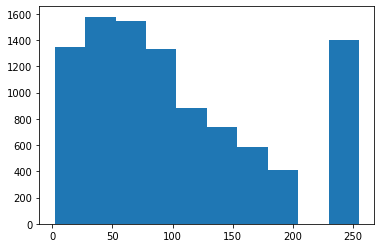

In [ ]:
plt.hist(fwd)